# Gravitational Models Comparison

In this tutorial, we'll compare various **Gravitational Models**.

## Setup

Let's import the necessary libraries:

In [1]:
import numpy as np

import pandas as pd

import plotly.graph_objs as go

from ostk.physics import Environment
from ostk.physics.time import Instant
from ostk.physics.environment.gravitational import Earth as EarthGravitationalModel

## Computation

In [2]:
environment = Environment.default()
earth = environment.access_celestial_object_with_name("Earth")

Let's set up some gravitational models:

In [3]:
gravitational_models = [
    EarthGravitationalModel(EarthGravitationalModel.Type.Spherical),
    EarthGravitationalModel(EarthGravitationalModel.Type.WGS84),
    EarthGravitationalModel(EarthGravitationalModel.Type.EGM84),
    EarthGravitationalModel(EarthGravitationalModel.Type.EGM96),
]

And evaluate them at various altitudes:

In [4]:
altitudes = list(range(0, 1000000, 100000))

In [5]:
instant = Instant.J2000()

In [6]:
positions = [
    np.array([float(earth.get_equatorial_radius().in_meters() + altitude), 0.0, 0.0])
    for altitude in altitudes
]

In [7]:
def evaluate_field_values(gravitational_model, positions):
    field_values = [
        np.transpose(gravitational_model.get_field_value_at(position, instant))[0]
        for position in positions
    ]

    return field_values

In [8]:
field_valuess = [
    evaluate_field_values(gravitational_model, positions)
    for gravitational_model in gravitational_models
]
print(field_valuess)
print(altitudes)

[[-9.798285471812783, -9.498117084672169, -9.211533740415616, -8.937727860123543, -8.675950994401918, -8.42550870321693, -8.18575594562386, -7.9560929221730206, -7.735961319898761, -7.524840915948707], [-9.814241041880868, -9.513108776825897, -9.225633270500504, -8.951000633607185, -8.688456744928928, -8.437302058356305, -8.196886929018294, -7.9666074000230305, -7.74590139862987, -7.534245296986336], [-9.814307141616844, -9.513178979811148, -9.225699538056165, -8.95106240934248, -8.688514829376778, -8.437357149910085, -8.196939440406812, -7.966657554394403, -7.745949325710143, -7.534291088893372], [-9.814284387550872, -9.513160999207878, -9.22568814318402, -8.951055205359841, -8.688510334843228, -8.437354343587772, -8.196937668392207, -7.9666564151497585, -7.745948576059298, -7.534290581611349]]
[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000]


In [9]:
field_dfs = [
    pd.DataFrame(
        [
            [altitude, field.tolist()]
            for [altitude, field] in zip(altitudes, field_values)
        ],
        columns=["$altitude [m]$", "$g_x$"],
    )
    for field_values in field_valuess
]

# field_dfs = [pd.DataFrame([[altitude, field.tolist()] for [altitude, field] in zip(altitudes, field_values)], columns=['$altitude [m]$', '$g_x$', '$g_y$', '$g_z$']) for field_values in field_valuess]

## Display

Table:

In [10]:
field_dfs[0]

,$altitude [m]$,$g_x$
0,0,-9.798285
1,100000,-9.498117
2,200000,-9.211534
3,300000,-8.937728
4,400000,-8.675951
5,500000,-8.425509
6,600000,-8.185756
7,700000,-7.956093
8,800000,-7.735961
9,900000,-7.524841


Scatter plot:

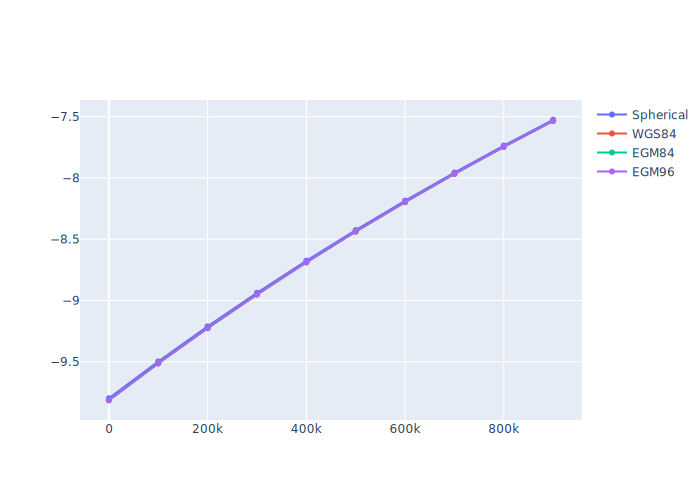

In [19]:
figure = go.Figure(
    data=[
        go.Scatter(
            x=field_df["$altitude [m]$"],
            y=field_df["$g_x$"],
            name=model.get_type().name,
        )
        for model, field_df in zip(gravitational_models, field_dfs)
    ]
)

figure.show("svg")

---